### OPTION 2. PYMACEUTICALS INC
    # Create a scatter plot that shows how the tumor volume changes over time for each treatment.
    # Create a scatter plot that shows how the number of metastatic sites change over time 
      for treatment
    # Create a scatter plot that shows the number of mice still alive through the course of 
      treatment (Survival rate).
    # Create a bar graph that compares the total % tumor volume change for each drug across the
      full 45 days.

In [1]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the files loaded, sort.
datafile1 = "raw_data/clinicaltrial_data.csv"
datafile2 = "raw_data/mouse_drug_data.csv"

df1 = pd.read_csv(datafile1)
df2 = pd.read_csv(datafile2)

df1 = df1.sort_values(["Mouse ID"], ascending = True)
df2 = df2.sort_values(["Mouse ID"], ascending = True)

In [3]:
# Merge the two files on "Mouse ID."  Find mean.
df = pd.merge(df1, df2, on = "Mouse ID", how = "outer")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,a203,0,45.000000,0,Infubinol
1,a203,5,48.508468,0,Infubinol
2,a203,25,56.793208,1,Infubinol
3,a203,40,63.593490,2,Infubinol
4,a203,35,61.931650,2,Infubinol


In [22]:
# Find Mean.
df2 = df.sort_values(by = ["Drug", "Timepoint"], ascending = [True, True])
df2 = df2[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug"]]

df_ondrugs_mean = df2.groupby(["Drug", "Timepoint"]).mean()
df_ondrugs_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Find SEM.
df_ondrugs_sem = df2.groupby(["Drug", "Timepoint"]).sem()
del df_ondrugs_sem["Mouse ID"]
df_ondrugs_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Flip the tables.
df_unstack = df_ondrugs_mean.reset_index()

flip_mean = df_ondrugs_mean.unstack(level = 0)
flip_sem = df_ondrugs_sem.unstack(level = 0)

flip_mean.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

### Scatter plot for Tumor Resposne to Treatment

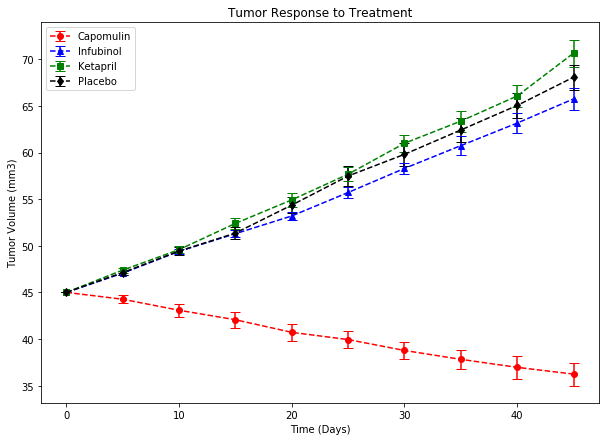

In [7]:
# Get the graph together.  Set x and y variables.
c_mean = list(flip_mean["Tumor Volume (mm3)", "Capomulin"])
i_mean = list(flip_mean["Tumor Volume (mm3)", "Infubinol"])
k_mean = list(flip_mean["Tumor Volume (mm3)", "Ketapril"])
p_mean = list(flip_mean["Tumor Volume (mm3)", "Placebo"])

c_sem = list(flip_sem["Tumor Volume (mm3)", "Capomulin"])
i_sem = list(flip_sem["Tumor Volume (mm3)", "Infubinol"])
k_sem = list(flip_sem["Tumor Volume (mm3)", "Ketapril"])
p_sem = list(flip_sem["Tumor Volume (mm3)", "Placebo"])

x_axis = list(df_unstack["Timepoint"].unique())

# Plot it.
plt.figure(figsize=(10, 7))

plt.errorbar(x_axis, c_mean, c_sem, fmt = "o", color = "red", solid_capstyle = "butt", 
             linestyle = "dashed", label = "Capomulin", capsize = 5)
plt.errorbar(x_axis, i_mean, i_sem, fmt = "^", color = "blue", solid_capstyle = "butt", 
             linestyle = "dashed", label = "Infubinol", capsize = 5)
plt.errorbar(x_axis, k_mean, k_sem, fmt = "s", color = "green", solid_capstyle = "butt", 
             linestyle = "dashed", label = "Ketapril", capsize = 5)
plt.errorbar(x_axis, p_mean, p_sem, fmt = "d", color = "black", solid_capstyle = "butt", 
             linestyle = "dashed", label = "Placebo", capsize = 5)
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

### METASTATIC RESPONSE TO TREATMENT.  (Number of metastases over time.)

In [9]:
# Get mean.
df3 = df.sort_values(by = ["Drug", "Timepoint"], ascending = [True, True])
df3 = df3[["Mouse ID", "Timepoint", "Metastatic Sites", "Drug"]]
df_metastatic_mean = df3.groupby(["Drug", "Timepoint"]).mean()
df_metastatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Get SEM.
df_metastatic_sem = df3.groupby(["Drug", "Timepoint"]).sem()
del df_metastatic_sem["Mouse ID"]
df_metastatic_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Flip the table.
meta_mean = df_metastatic_mean["Metastatic Sites"].unstack(level = 0)
df_metastatic_sem = df3.groupby(["Drug", "Timepoint"]).sem()
meta_sem = df_metastatic_sem["Metastatic Sites"].unstack(level = 0)

meta_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


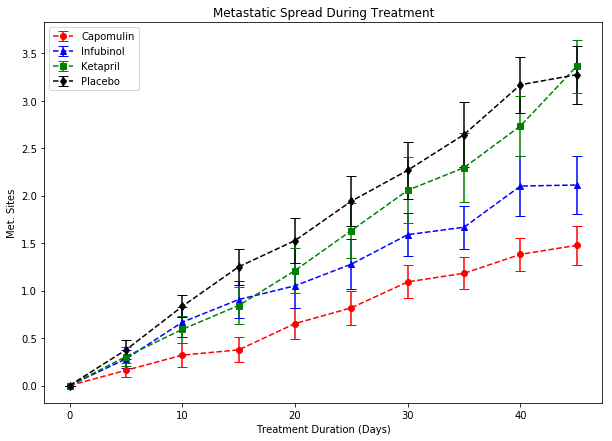

In [12]:
# Get the graph together.  Set x and y variables.
capomulin_mmean = list(meta_mean["Capomulin"])
infubinol_mmean = list(meta_mean["Infubinol"])
ketapril_mmean = list(meta_mean["Ketapril"])
placebo_mmean = list(meta_mean["Placebo"])

capomulin_msem = list(meta_sem["Capomulin"])
infubinol_msem = list(meta_sem["Infubinol"])
ketapril_msem = list(meta_sem["Ketapril"])
placebo_msem = list(meta_sem["Placebo"])

x_axis = list(df_unstack["Timepoint"].unique())

# Plot it.
plt.figure(figsize=(10, 7))
plt.errorbar(x_axis, capomulin_mmean, capomulin_msem, fmt = "o", color = "red", 
                         solid_capstyle = "butt", linestyle = "dashed", label = "Capomulin", 
                         capsize = 5)
plt.errorbar(x_axis, infubinol_mmean, infubinol_msem, fmt = "^", color = "blue", 
                         solid_capstyle = "butt", linestyle = "dashed", label = "Infubinol", 
                         capsize = 5)

plt.errorbar(x_axis, ketapril_mmean, ketapril_msem, fmt = "s", color = "green", 
                         solid_capstyle = "butt", linestyle = "dashed", label = "Ketapril", 
                         capsize = 5)
plt.errorbar(x_axis, placebo_mmean, placebo_msem, fmt = "d", color = "black", 
                         solid_capstyle = "butt", linestyle = "dashed", label = "Placebo", 
                         capsize = 5)
plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.show()

### SURVIVAL RATES. (Number of mice alive over time.)

In [14]:
# Find the number of mice.
df4 = df.sort_values(by = ["Drug", "Timepoint"], ascending = [True, True])
df_no_mice = df4.groupby(["Drug", "Timepoint"]).count()
df_no_mice = df_no_mice.rename(columns = {"Mouse ID": "Mouse Count"})
del df_no_mice["Metastatic Sites"]
df_no_mice.head()

Mouse Count  Tumor Volume (mm3)
Drug      Timepoint                                 
Capomulin 0                   25                  25
          5                   25                  25
          10                  25                  25
          15                  24                  24
          20                  23                  23

In [15]:
# Flip the table.
mouse_count = df_no_mice["Mouse Count"].unstack(level = 0)
mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
# Find the percentages.
mouse_count["Capomulin"] = [(x/mouse_count["Capomulin"][0]) * 100 for x in mouse_count["Capomulin"]]
mouse_count["Infubinol"] = [(x/mouse_count["Infubinol"][0]) * 100 for x in mouse_count["Infubinol"]]
mouse_count["Ketapril"] = [(x/mouse_count["Ketapril"][0]) * 100 for x in mouse_count["Ketapril"]]
mouse_count["Placebo"] = [(x/mouse_count["Placebo"][0]) * 100 for x in mouse_count["Placebo"]]

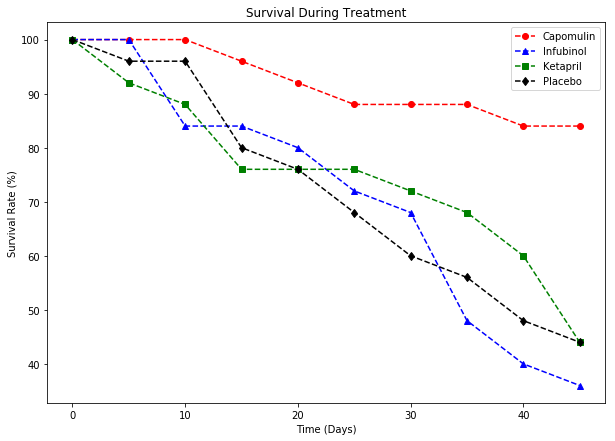

In [17]:
# Get the graph together.  Set x and y variables.
capomulin_count = list(mouse_count["Capomulin"])
infubinol_count = list(mouse_count["Infubinol"])
ketapril_count = list(mouse_count["Ketapril"])
placebo_count = list(mouse_count["Placebo"])

x_axis = list(df_unstack["Timepoint"].unique())

# Plot it.
plt.figure(figsize=(10, 7))
capomulin, = plt.plot(x_axis, capomulin_count, marker = "o", color = "red", linestyle = "dashed", 
                      label = "Capomulin")
infubinol, = plt.plot(x_axis, infubinol_count, marker = "^", color = "blue", linestyle = "dashed",
                      label = "Infubinol")
ketapril, = plt.plot(x_axis, ketapril_count, marker = "s", color = "green", linestyle = "dashed",
                     label = "Ketapril")
placebo, = plt.plot(x_axis, placebo_count, marker = "d", color = "black", linestyle = "dashed",
                    label = "Placebo")

plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc = "best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.show()

### SUMMARY BAR GRAPH.  (Percent tumor volume change over time.)

In [19]:
# Find percent change of tumor size.
capo = round((((c_mean[9] - c_mean[0])/c_mean[0]) * 100), 1)
infu = round((((i_mean[9] - i_mean[0])/i_mean[0]) * 100), 1)
keta = round((((k_mean[9] - k_mean[0])/k_mean[0]) * 100), 1)
plac = round((((p_mean[9] - p_mean[0])/p_mean[0]) * 100), 1)

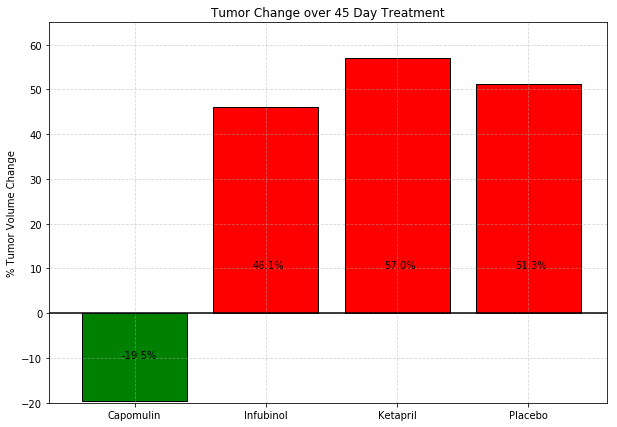

In [23]:
drug_names = [capo, infu, keta, plac]
x_axis = np.arange(len(drug_names))
color = []
edgecolor = []

for x in drug_names:
    if x >= 0:
        color.append("red")
        edgecolor.append("black")
    else:
        color.append("green")
        edgecolor.append("black")


plt.figure(figsize=(10, 7))
foo = plt.bar(x_axis, drug_names, color = color, edgecolor = edgecolor, align = "edge")
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.xlim(-0.25, 4)
plt.ylim(-20, 65)
plt.hlines(0, -0.25, 4, alpha = 1)
plt.grid(linestyle= "--", alpha = 0.5)

plt.text(0.3, -10, str(capo) + "%")
plt.text(1.3, 10, str(infu) + "%")
plt.text(2.3, 10, str(keta) + "%")
plt.text(3.3, 10, str(plac) + "%")


plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


plt.show()

### Summary.
    # There were a number of different drug-based therapeutics that target cancer.  Of those
      drugs, three were selected and analyzed for efficacy in comparison with a placebo
      treatment.  The three drugs are Capomulin, Infubinol, and Ketapril.
    
    # Tumor volume over time was evaluated.  Ketapril was not effective; it had a slightly 
      worse outcome compared to the placebo.  The tumor volume actually increased towards the
      end of the treatment course.  Infubinol was slightly better than the placebo in that the
      tumor size decreased towards the end of the treatment course.  Interestingly, Capomulin
      was the best performer in tumor size reduction.  There was an approximate 20% reduction
      in tumor size.
    
    # Metastatic spread over time was evaluated.  In the absence of treatment, metastatic
      tumors increased over time.  All drugs, however, reduced the overall number of metastases.
      The best performer was Capomulin.
    
    # Survival of the tumor ridden hosts were evaluated.  Over time, both Infubinol and Ketapril
      treated mice had the comparable mortality rates relative to the placebo group.  Only the
      Capomulin treated population had an approximate 85% survival rate--this is rougly 40%
      better than the other groups.
    
### Conclusion:
    # Capomulin should move forward for clinical evaluation.  The clinical presentation of
      Capumulin-treated mice is promising in that the decrease in tumor size, the reduction
      in the number of metastases, and the resulting survival rate all point to possible
      high efficacy for cancer treatment in humans.